# Sample code for exercise 1-2
2017 Aug. Tsuyoshi Okubo  
2018 Dec. modified

In this code, you can simulate SVD(Schmidt decomposition) of the ground state of spin model on 1d chain.  
$$\mathcal{H} = \sum_{i} J_z S_{i,z}S_{i+1,z} + J_{xy} (S_{i,x}S_{i+1,x} + S_{i,y}S_{i+1,y}) - h_x \sum_i S_{i,x} + D\sum_i S_{i,z}^2$$

You can change   

- N: # of sites
- m: size of spin  (2S = 2m + 1)  
- Jz: amplitude of SzSz interaction  
- Jxy: amplitude of SxSx + SySy interaction  
- hx : amplitude of external field alogn x direction  
- D : Single ion anisotropy  
- periodic: Flag for periodic boundary condition  

In [1]:
import numpy as np
import scipy.linalg as linalg
from matplotlib import pyplot
import ED 

In [2]:
N=10          ## Chain length 
m = 3         ## m = 2S + 1, e.g. m=3 for S=1 
Jz = 1.0      ## Jz for SzSz interaction
Jxy = 1.0     ## Jxy for SxSx + SySy interaction
hx = 0.0      ## external field along x direction
D = 0.0       ## single ion anisotropy
periodic = False ## periodic boundasry condition

In [3]:
print("2S = m - 1, N-site spin chain")
print("N = "+repr(N))
print("m = "+repr(m))
print("Hamiltonian parameters:")
print("Jz = "+repr(Jz))
print("Jxy = "+repr(Jxy))
print("hx = "+repr(hx))
print("D = "+repr(D))
print("periodic = "+repr(periodic))


2S = m - 1, N-site spin chain
N = 10
m = 3
Hamiltonian parameters:
Jz = 1.0
Jxy = 1.0
hx = 0.0
D = 0.0
periodic = False


In [4]:
## Obtain the smallest eigenvalue
eig_val,eig_vec = ED.Calc_GS(m,Jz, Jxy,hx,D,N,k=1,periodic=periodic)
if periodic :
    print("Ground state energy per bond= " +repr(eig_val[0]/N))
else:
    print("Ground state energy per bond= " +repr(eig_val[0]/(N-1)))


Ground state energy per bond= -1.4327289035789932


In [5]:
## Make matrix from wave function
Mat = eig_vec[:,0].reshape(m**int(N/2),m**(N-int(N/2)))

## SVD
U,s,VT = linalg.svd(Mat,full_matrices=False)

In [6]:
## Entanglement entropy
EE = -np.sum(s**2*np.log(s**2))
print("normalization = "+ repr(np.sum(s**2)))

s /=np.sqrt(np.sum(s**2))
EE = -np.sum(s**2*np.log(s**2))
print("Entanglement entropy = " + repr(EE))

normalization = 0.9999999999999987
Entanglement entropy = 1.2891127980407557


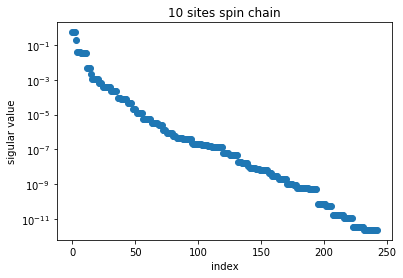

In [7]:
## plot singular values
pyplot.title(repr(N)+" sites spin chain")
pyplot.plot(np.arange(m**(N/2)),s,"o")
pyplot.xlabel("index")
pyplot.ylabel("sigular value")
pyplot.yscale("log")
pyplot.show()
